In [1]:
#import pandas
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm

Samples = 201

In [4]:
filename = "/Users/lmatayoshi/Desktop/EEG/P01.mat"


In [5]:
p01 = sio.loadmat(filename)

In [6]:
matrix_p01 = p01['data']

In [7]:
matrix_p01.shape

(894, 256, 201)

In [8]:
electrodo_8_matrix = matrix_p01[:, 8, :]
electrodo_44_matrix = matrix_p01[:,44, :]
electrodo_80_matrix = matrix_p01[:, 80, :]
electrodo_131_matrix = matrix_p01[:, 131, :]
electrodo_185_matrix = matrix_p01[:, 185, :]

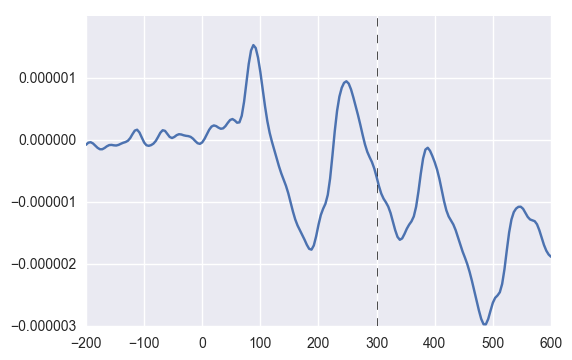

In [9]:
%matplotlib inline
#plt.xkcd()
import numpy as np
plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_8_matrix.mean(axis=0))
plt.axvline(x=300, linestyle='--', color='black', linewidth=0.5)

## Ejercicio 1

In [10]:
electrodo_8_matrix = matrix_p01[:, 8, :]
electrodo_44_matrix = matrix_p01[:,44, :]
electrodo_80_matrix = matrix_p01[:, 80, :]
electrodo_131_matrix = matrix_p01[:, 131, :]
electrodo_185_matrix = matrix_p01[:, 185, :]

In [11]:
def plot_ej1(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion gráfica el  promedio del voltaje de cada muestra por epoch en un electrodo'''
    xs = electrodo_i_matrix.shape[0]
    plt.bar(range(0,xs), electrodo_i_matrix.mean(axis=1), linestyle=linestyle)

## Graficos

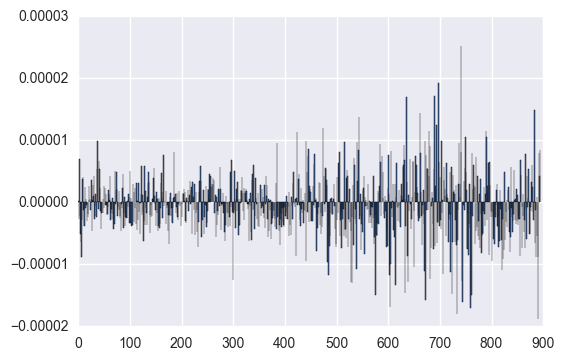

In [12]:
%matplotlib inline
import numpy as np

#electrodo_i_matrix = electrodo_8_matrix
plot_ej1(electrodo_8_matrix)

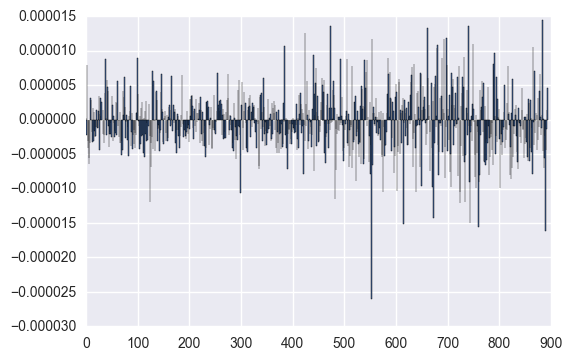

In [13]:
plot_ej1(electrodo_44_matrix)

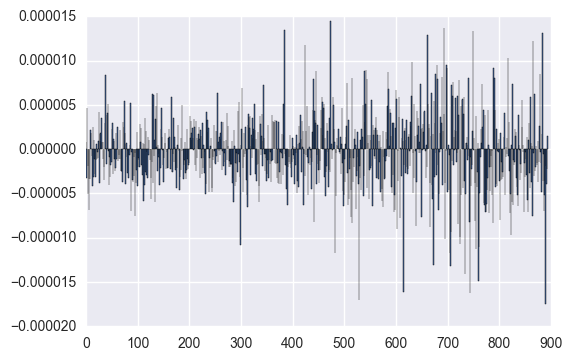

In [14]:
plot_ej1(electrodo_80_matrix)

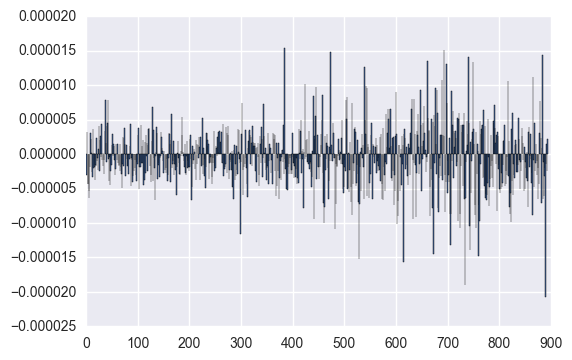

In [15]:
plot_ej1(electrodo_131_matrix)

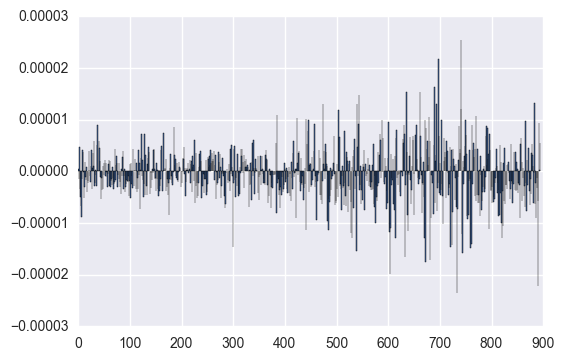

In [16]:
plot_ej1(electrodo_185_matrix)

In [17]:
def grafico_heatmap(frecuencies):
    frecuencies = np.array(frecuencies).T
    ax=seaborn.heatmap(frecuencies,norm=LogNorm(vmin=frecuencies.min(), vmax=frecuencies.max()))
    plt.show()

In [18]:
electrodes = [8, 44, 80, 131, 185]
cant_frec = 30

In [19]:
def all_elec_frecuencias(electrodes):
    all_frecuencies = np.zeros((len(electrodes), 894, 30))
    j = 0
    for electrodo_x in electrodes:
        frecuencies = []
        for i in range (0,894):
            elec_x_frec = matrix_p01[i, electrodo_x, :]
            a, b = welch(elec_x_frec, float(Samples/0.8))
            frecuencies.append(b[0:cant_frec])
        #print frecuencies
        frecuencies = np.array(frecuencies)#.T
        all_frecuencies[j] = frecuencies
        j += 1
    return all_frecuencies

In [20]:
matrix_all_frec = all_elec_frecuencias(electrodes)
mean_all_frec = matrix_all_frec.mean(0)

/usr/local/lib/python2.7/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


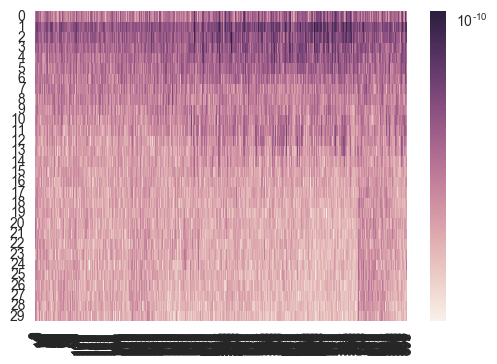

In [21]:
grafico_heatmap(mean_all_frec)

# A2

In [37]:
xs = range(0,100)
ys_1 = [np.sin(x) for x in xs]
ys_2 = np.array(ys_1) * 2
sin_matrix = np.array([ys_1, ys_2]).shape

In [39]:
f, Pxx = welch(sin_matrix, nfft=2048)
print (f, Pxx)

(array([  0.00000000e+00,   4.88281250e-04,   9.76562500e-04, ...,
         4.99023438e-01,   4.99511719e-01,   5.00000000e-01]), array([ 2401.,  4802.,  4802., ...,  4802.,  4802.,  2401.]))


In [110]:
def powers_welch_by_epoch(electrode):
    '''para un electrodo, cada epoch(todas sus muetras) calculamos welch, 
    es decir todas las frecuencias y sus potencias'''
    #for i in range (0,894):
    elec_x_frec = matrix_p01[:, electrode, :]
    f, Pxx = welch(elec_x_frec, float(Samples/0.8), nfft=1025)
    return f,Pxx

In [111]:
#f.shape
Pxx.shape

(894, 513)

In [118]:
f, _ = powers_welch_by_epoch(0)
f2, _ = powers_welch_by_epoch(3)
f3, _ = powers_welch_by_epoch(50)
f == f3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [113]:
f[0:50]

array([  0.        ,   0.24512195,   0.4902439 ,   0.73536585,
         0.9804878 ,   1.22560976,   1.47073171,   1.71585366,
         1.96097561,   2.20609756,   2.45121951,   2.69634146,
         2.94146341,   3.18658537,   3.43170732,   3.67682927,
         3.92195122,   4.16707317,   4.41219512,   4.65731707,
         4.90243902,   5.14756098,   5.39268293,   5.63780488,
         5.88292683,   6.12804878,   6.37317073,   6.61829268,
         6.86341463,   7.10853659,   7.35365854,   7.59878049,
         7.84390244,   8.08902439,   8.33414634,   8.57926829,
         8.82439024,   9.0695122 ,   9.31463415,   9.5597561 ,
         9.80487805,  10.05      ,  10.29512195,  10.5402439 ,
        10.78536585,  11.0304878 ,  11.27560976,  11.52073171,
        11.76585366,  12.01097561])

In [168]:
frecs = []
for i in range(0,255):
    f, Pxx = powers_welch_by_epoch(i)
    Pxx = Pxx
    frec = Pxx.mean(0)
    frecs.append(frec)

In [169]:
frecs = np.array(frecs)
#frecs.shape
#frecs = frecs[:,0:100]
#frecs.shape

In [170]:
frecs.shape

(255, 513)

In [155]:
f[0:100].shape

(100,)

In [156]:
frecs[0].shape

(100,)

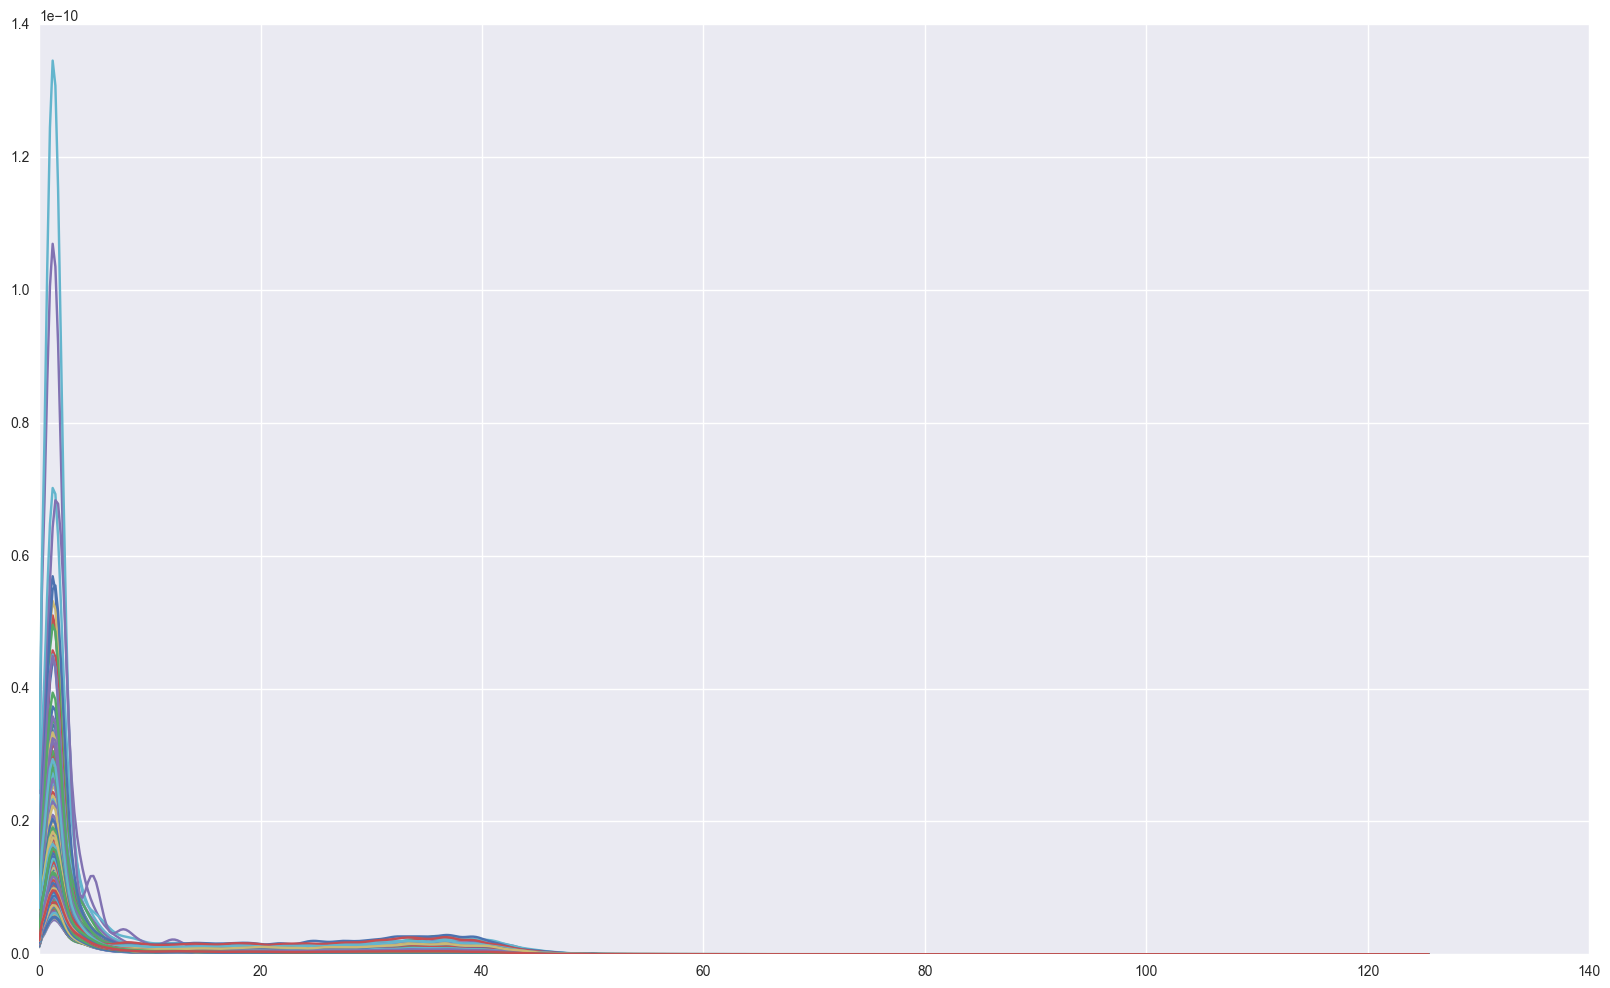

In [172]:
plt.figure(figsize=(20,12))
for i in range(0,255):
    plt.plot(f,frecs[i])

In [107]:
def plot_ej2(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion grafica el promedio entre epochs para cada muestra (1er muestra, primer medición 
    y %entre primeras epochs, la ultima muestra es la última medicion y % entre ultimas epochs )'''
    xs = electrodo_i_matrix.shape[1]
    plt.plot(range(0,xs), electrodo_i_matrix.mean(axis=0), linestyle=linestyle)

In [108]:
xs = electrodo_8_matrix.shape[1]
xs

201

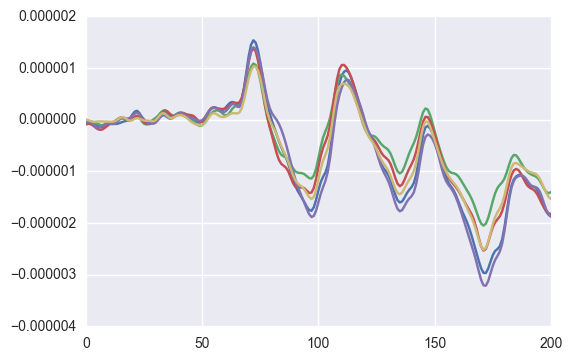

In [109]:
plot_ej2(electrodo_8_matrix)
plot_ej2(electrodo_80_matrix)
plot_ej2(electrodo_44_matrix)
plot_ej2(electrodo_185_matrix)
plot_ej2(electrodo_131_matrix)

In [ ]:
# Bandas de frecuencia
DELTA = (0,4)
THETA = (4,8)
APLHA = (8,13)
BETA = (13,30)
GAMMA = (30,100)

In [ ]:
#
#ej_2 = epochs x las 30 primeras frecuencias 
# cada epoch representa: las frecuencias que tiene esa eposh
ej_2.shape

In [ ]:
m = ej_2.mean(1)
plt.plot(range(0,len(m)),m)

In [145]:
xs = []
for i in [4,8,13,30]:
    for j in range(0,len(f)):
        if(f[j]>i):
            xs.append(j);
            break;

In [146]:
xs

[17, 33, 54, 123]

In [147]:
print f[17]
print f[33]
print f[54]
print f[123]

4.16707317073
8.08902439024
13.2365853659
30.15


In [163]:
frecs.shape

(255, 100)

In [173]:
frecs_mean = np.mean(frecs, axis=0)

In [174]:
frecs_mean.shape

(513,)

In [139]:
(x for x in range(1,10) if x > 5).next()

6

In [175]:
frecs_mean.shape

(513,)

In [187]:
Delta = np.mean(frecs_mean[0:xs[0]])
Theta = np.mean(frecs_mean[xs[0]:xs[1]])
Alpha =np.mean(frecs_mean[xs[1]:xs[2]])
Beta =np.mean(frecs_mean[xs[2]:xs[3]])
Gamma =np.mean(frecs_mean[xs[3]:])

In [188]:
Delta

8.3726992753859129e-12

In [189]:
Theta

1.4350068514475198e-12

In [190]:
Alpha

5.0582331823690463e-13

In [191]:
Beta

2.6901629090379322e-13

In [192]:
Gamma

4.043945389449624e-14

In [197]:
res = [Delta, Theta, Alpha, Beta, Gamma]

<Container object of 5 artists>

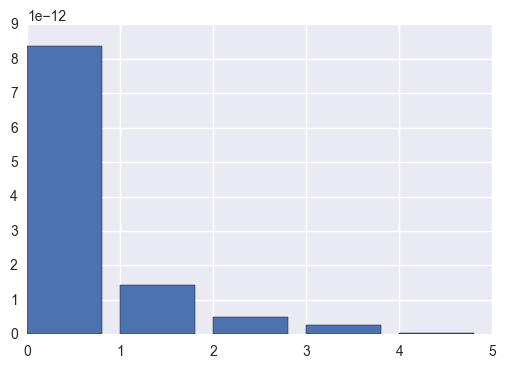

In [198]:
plt.bar(range(len(res)), [Delta, Theta, Alpha, Beta, Gamma])

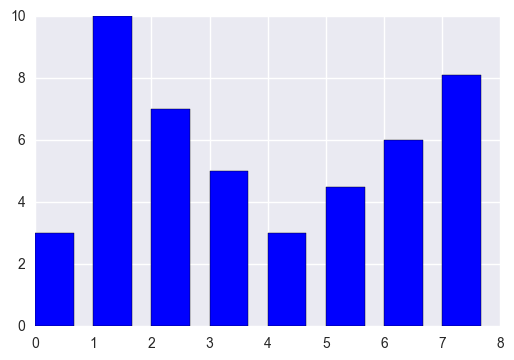

In [195]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")


fig = plt.gcf()

In [228]:
filename_s1 = "/Users/lmatayoshi/Desktop/EEG/S01.mat"
s01 = sio.loadmat(filename_s1)
matrix_s01 = s01['data']
Epochs_s01 = matrix_s01.shape[0]
Samples_s01 = matrix_s01.shape[2]
Electrodes_s01 = matrix_s01.shape[1]

In [229]:
s1_electrodo_8_matrix = matrix_s01[:, 8, :]
s1_electrodo_44_matrix = matrix_s01[:,44, :]
s1_electrodo_80_matrix = matrix_s01[:, 80, :]
s1_electrodo_131_matrix = matrix_s01[:, 131, :]
s1_electrodo_185_matrix = matrix_s01[:, 185, :]

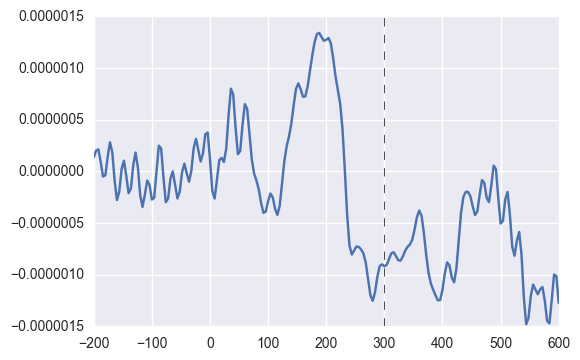

In [230]:
%matplotlib inline
#plt.xkcd()
plt.plot(np.linspace(-200.0,600.0,Samples),s1_electrodo_8_matrix.mean(axis=0))
plt.axvline(x=300, linestyle='--', color='black', linewidth=0.5)

In [232]:
def all_elec_frecuencias(electrodes,samples):
    all_frecuencies = np.zeros((len(electrodes), samples, 30))
    j = 0
    for electrodo_x in electrodes:
        frecuencies = []
        for i in range (0,samples):
            elec_x_frec = matrix_s01[i, electrodo_x, :]
            a, b = welch(elec_x_frec, float(Samples/0.8))
            frecuencies.append(b[0:cant_frec])
        #print frecuencies
        frecuencies = np.array(frecuencies)#.T
        all_frecuencies[j] = frecuencies
        j += 1
    return all_frecuencies

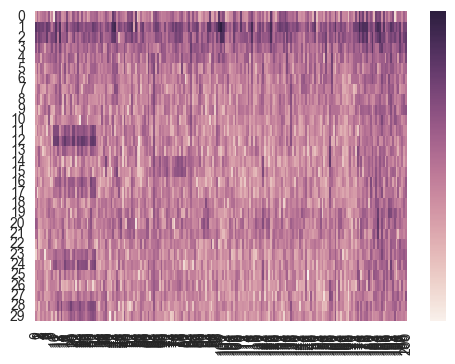

In [234]:
matrix_all_frec = all_elec_frecuencias(electrodes,Samples_s01)
mean_all_frec = matrix_all_frec.mean(0)
grafico_heatmap(mean_all_frec)

In [236]:
def powers_welch_by_epoch(electrode):
    '''para un electrodo, cada epoch(todas sus muetras) calculamos welch, 
    es decir todas las frecuencias y sus potencias'''
    #for i in range (0,894):
    elec_x_frec = matrix_s01[:, electrode, :]
    f, Pxx = welch(elec_x_frec, float(Samples/0.8), nfft=1025)
    return f,Pxx

In [237]:
frecs = []
for i in range(0,255):
    f, Pxx = powers_welch_by_epoch(i)
    Pxx = Pxx
    frec = Pxx.mean(0)
    frecs.append(frec)
    
frecs = np.array(frecs)


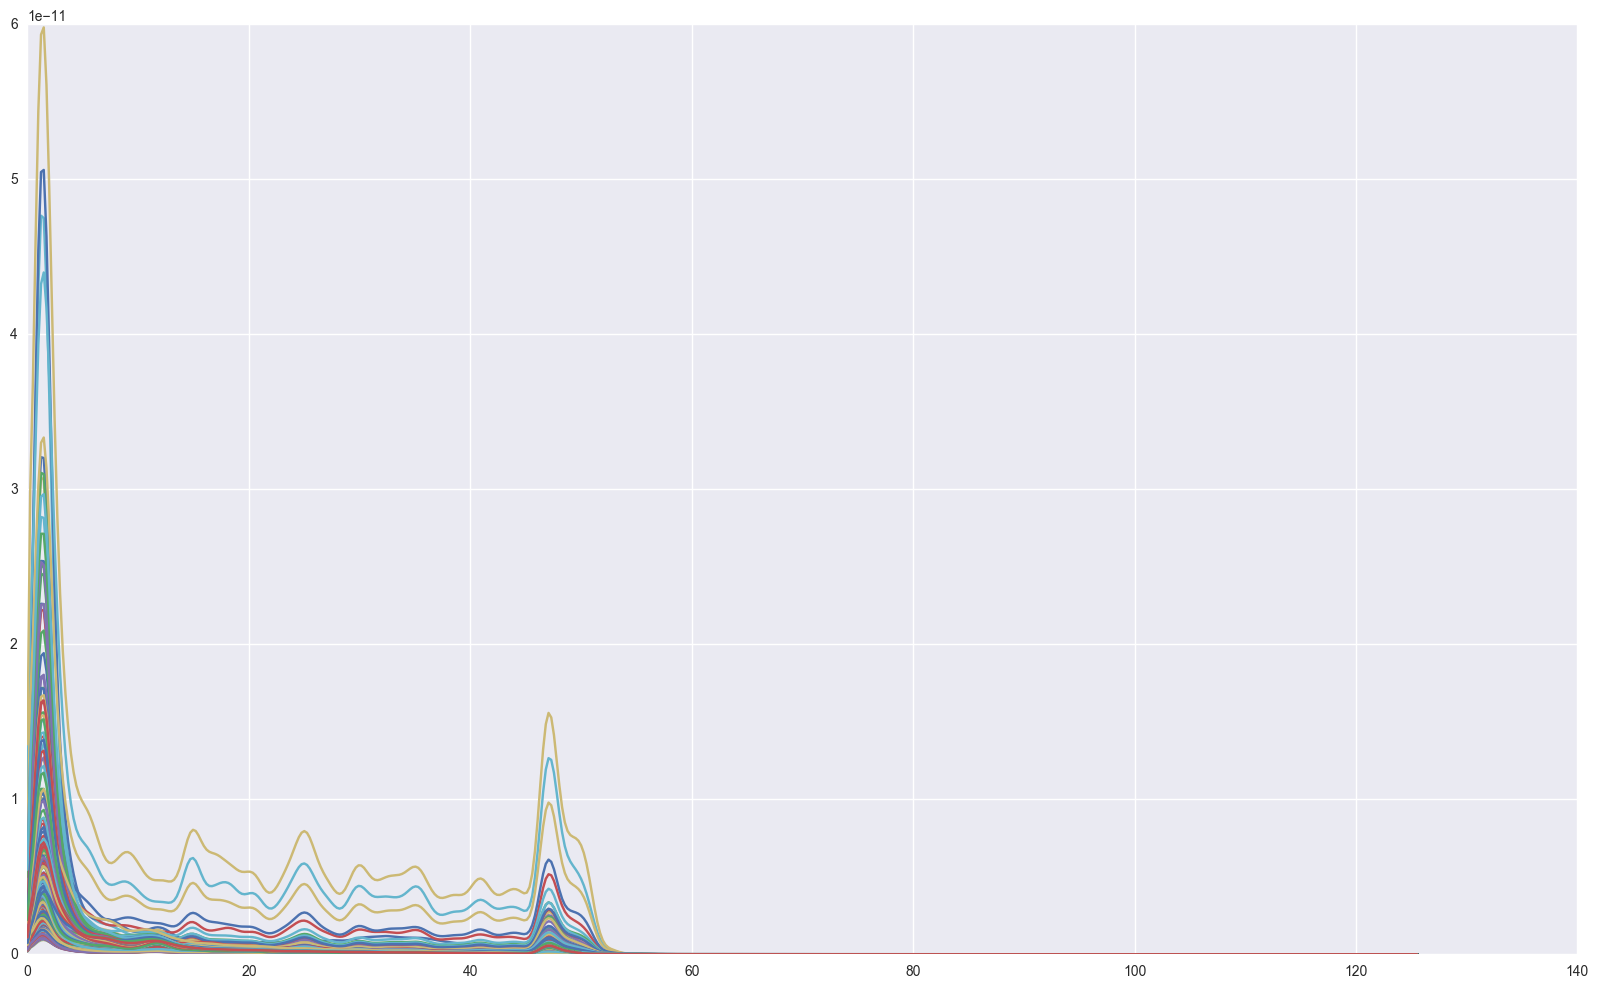

In [238]:
plt.figure(figsize=(20,12))
for i in range(0,255):
    plt.plot(f,frecs[i])

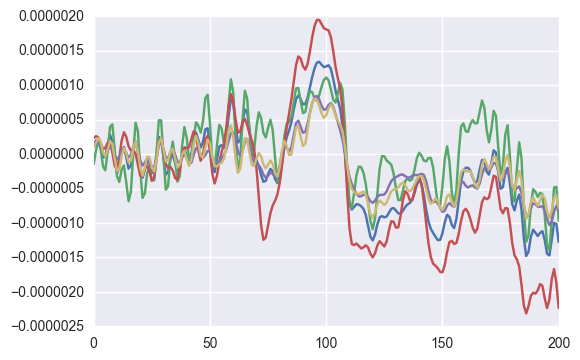

In [242]:
def plot_ej2(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion grafica el promedio entre epochs para cada muestra (1er muestra, primer medición 
    y %entre primeras epochs, la ultima muestra es la última medicion y % entre ultimas epochs )'''
    xs = electrodo_i_matrix.shape[1]
    plt.plot(range(0,xs), electrodo_i_matrix.mean(axis=0), linestyle=linestyle)
    
plot_ej2(s1_electrodo_8_matrix)
plot_ej2(s1_electrodo_80_matrix)
plot_ej2(s1_electrodo_44_matrix)
plot_ej2(s1_electrodo_185_matrix)
plot_ej2(s1_electrodo_131_matrix)

<Container object of 5 artists>

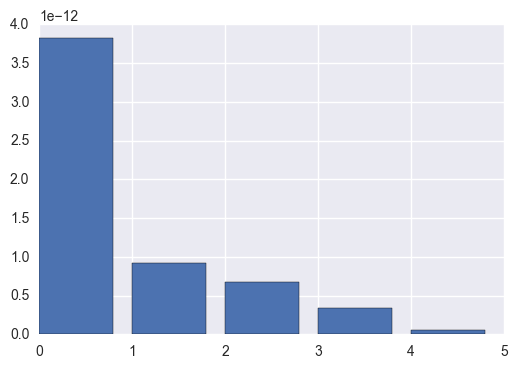

In [243]:
frecs_mean = np.mean(frecs, axis=0)
frecs_mean.shape
Delta = np.mean(frecs_mean[0:xs[0]])
Theta = np.mean(frecs_mean[xs[0]:xs[1]])
Alpha =np.mean(frecs_mean[xs[1]:xs[2]])
Beta =np.mean(frecs_mean[xs[2]:xs[3]])
Gamma =np.mean(frecs_mean[xs[3]:])
res = [Delta, Theta, Alpha, Beta, Gamma]
plt.bar(range(len(res)), [Delta, Theta, Alpha, Beta, Gamma])